## **Exploratory Data Analysis- Delhi Weather Data**
**Problem Statement**: A historical analysis of the evolution of weather conditions in Delhi, owing to the changes occurring due to industrialization, increase of vehicles and climate change.

More information on the dataset can be found here- https://www.kaggle.com/mahirkukreja/delhi-weather-data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**LOADING AND UNDERSTANDING THE DATA**


In [2]:
url = 'https://raw.githubusercontent.com/avinxxsh/OSTDataset/main/testset.csv' 
df = pd.read_csv(url) # loading dataset into the variable df
df.head(5) # displaying first 5 entries from the dataset

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [3]:
df.tail(5) #displaying last 5 entries from the dataset

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
100985,20170424-06:00,Haze,17.0,0,0,NaN,25.0,NaN,1005.0,0,0,34.0,0,0,4.0,320.0,NW,NaN,NaN,11.1
100986,20170424-09:00,Haze,14.0,0,0,NaN,16.0,NaN,1003.0,0,0,38.0,0,0,4.0,320.0,NW,NaN,NaN,22.2
100987,20170424-12:00,Haze,12.0,0,0,NaN,14.0,NaN,1002.0,0,0,36.0,0,0,4.0,270.0,West,NaN,NaN,18.5
100988,20170424-15:00,Haze,15.0,0,0,NaN,27.0,NaN,1004.0,0,0,32.0,0,0,2.0,320.0,NW,NaN,NaN,3.7
100989,20170424-18:00,Haze,15.0,0,0,NaN,30.0,NaN,1005.0,0,0,30.0,0,0,2.0,320.0,NW,NaN,NaN,3.7


In [4]:
df.shape #(rows, columns) in the dataset

(100990, 20)

In [5]:
df.describe() # display basic statistics of all columns in dataset

,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wgustm,_windchillm,_wspdm
count,100369.000000,100990.000000,100990.000000,29155.000000,100233.000000,0.0,1.007580e+05,100990.000000,100990.000000,100317.000000,100990.000000,100990.00000,96562.000000,86235.000000,1072.000000,579.000000,98632.000000
mean,15.741205,0.069690,0.000129,35.651710,57.909481,NaN,1.932331e+03,0.026260,0.000010,25.451269,0.009427,0.00002,2.402774,163.549974,37.671175,5.713817,7.678463
std,7.058587,0.254625,0.011345,5.015384,23.807771,NaN,3.183786e+05,0.159908,0.003147,8.482859,0.096633,0.00445,20.746028,120.002076,6.848666,1.203290,11.932157
min,-24.000000,0.000000,0.000000,26.800000,4.000000,NaN,-9.999000e+03,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,25.900000,2.100000,0.000000
25%,10.000000,0.000000,0.000000,31.700000,39.000000,NaN,1.002000e+03,0.000000,0.000000,19.000000,0.000000,0.00000,1.500000,50.000000,33.300000,4.900000,0.000000
50%,15.000000,0.000000,0.000000,35.100000,59.000000,NaN,1.008000e+03,0.000000,0.000000,27.000000,0.000000,0.00000,2.000000,160.000000,37.000000,6.100000,7.400000
75%,22.000000,0.000000,0.000000,39.200000,78.000000,NaN,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.00000,3.000000,270.000000,40.700000,6.800000,11.100000
max,75.000000,1.000000,1.000000,73.600000,243.000000,NaN,1.010614e+08,1.000000,1.000000,90.000000,1.000000,1.00000,6436.000000,960.000000,92.600000,7.300000,1514.900000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100918 non-null  object 
 2    _dewptm      100369 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _heatindexm  29155 non-null   float64
 6    _hum         100233 non-null  float64
 7    _precipm     0 non-null       float64
 8    _pressurem   100758 non-null  float64
 9    _rain        100990 non-null  int64  
 10   _snow        100990 non-null  int64  
 11   _tempm       100317 non-null  float64
 12   _thunder     100990 non-null  int64  
 13   _tornado     100990 non-null  int64  
 14   _vism        96562 non-null   float64
 15   _wdird       86235 non-null   float64
 16   _wdire       86235 non-null   object 
 17   _wgustm      1072 non-null    float64
 18   _wi

In [7]:
df.columns # display all column names

Index(['datetime_utc', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')

In [8]:
df.isnull().sum()

datetime_utc         0
 _conds             72
 _dewptm           621
 _fog                0
 _hail               0
 _heatindexm     71835
 _hum              757
 _precipm       100990
 _pressurem        232
 _rain               0
 _snow               0
 _tempm            673
 _thunder            0
 _tornado            0
 _vism            4428
 _wdird          14755
 _wdire          14755
 _wgustm         99918
 _windchillm    100411
 _wspdm           2358
dtype: int64

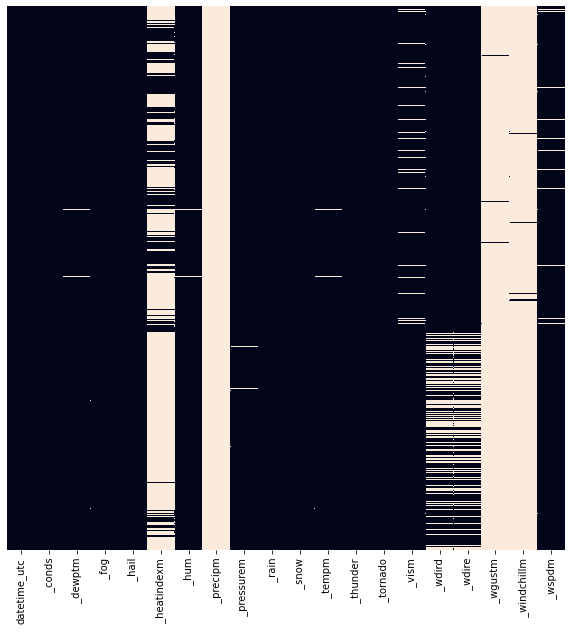

In [9]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

**CLEANING THE DATA**

In [10]:
import datetime as dt
from datetime import timedelta

In [11]:
df['formatted_date'] = pd.to_datetime(df['datetime_utc'])

In [12]:
df = df.drop('datetime_utc', 1) # dropping the datetime column since we have a new formatted datetime column

In [13]:
first_column = df.pop('formatted_date')
df.insert(0, 'formatted_date', first_column) # moving the formatted_date column to the beginning of the dataset(index = 0)
print(df.head(2)) 
print(df.tail(2))

       formatted_date  _conds   _dewptm  ...   _wgustm   _windchillm   _wspdm
0 1996-11-01 11:00:00   Smoke       9.0  ...       NaN           NaN      7.4
1 1996-11-01 12:00:00   Smoke      10.0  ...       NaN           NaN      NaN

[2 rows x 20 columns]
            formatted_date  _conds   _dewptm  ...   _wgustm   _windchillm   _wspdm
100988 2017-04-24 15:00:00    Haze      15.0  ...       NaN           NaN      3.7
100989 2017-04-24 18:00:00    Haze      15.0  ...       NaN           NaN      3.7

[2 rows x 20 columns]


In [14]:
df.columns

Index(['formatted_date', ' _conds', ' _dewptm', ' _fog', ' _hail',
       ' _heatindexm', ' _hum', ' _precipm', ' _pressurem', ' _rain', ' _snow',
       ' _tempm', ' _thunder', ' _tornado', ' _vism', ' _wdird', ' _wdire',
       ' _wgustm', ' _windchillm', ' _wspdm'],
      dtype='object')

In [15]:
df.isnull().sum()

formatted_date         0
 _conds               72
 _dewptm             621
 _fog                  0
 _hail                 0
 _heatindexm       71835
 _hum                757
 _precipm         100990
 _pressurem          232
 _rain                 0
 _snow                 0
 _tempm              673
 _thunder              0
 _tornado              0
 _vism              4428
 _wdird            14755
 _wdire            14755
 _wgustm           99918
 _windchillm      100411
 _wspdm             2358
dtype: int64

**ANALYSIS**

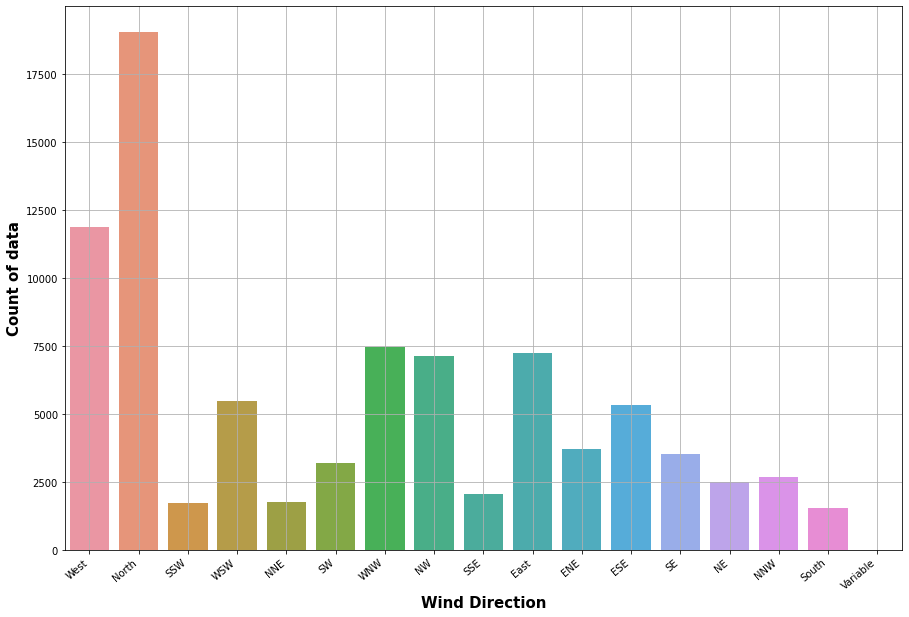

In [16]:
#Showing the spread of data in terms of wind direction

plt.figure(figsize=(15, 10))
sns.countplot(x=' _wdire', data=df)
plt.xticks(rotation=40, horizontalalignment='right')
plt.xlabel("Wind Direction",fontsize="15",fontweight="bold")
plt.ylabel("Count of data",fontsize="15",fontweight="bold")
plt.grid(True)
plt.show()

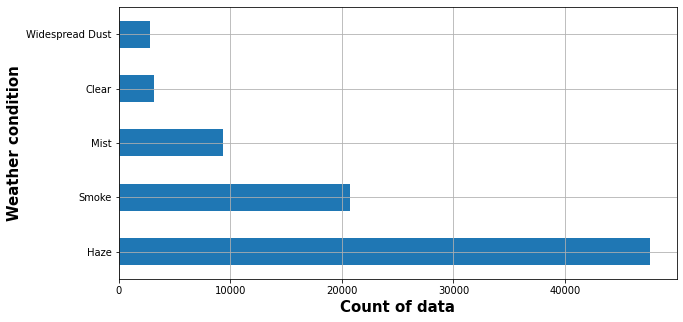

In [17]:
#Bar Graph showing the Top 5 Weather Conditions that have been recorded
plt.figure(figsize=(10, 5))
df[' _conds'].value_counts().sort_values(ascending=False)[:5].plot(kind='barh')
#plt.yticks(rotation=40, horizontalalignment='right')
plt.xlabel("Count of data",fontsize="15",fontweight="bold")
plt.ylabel("Weather condition",fontsize="15",fontweight="bold")
plt.grid(True)
plt.show()

#This shows that 'Haze' is the most commonly occuring Weather Condition in Delhi. Alarmingly, the Top 5 Conditions include 'Widespread Dust', 'Mist' and 'Smoke' as well.

#"Haze is mostly caused by air pollution from human activity including industry, power generation, transportation, and agriculture." This is what the National Park Service suggests.

In [18]:
df2 = df.drop(labels=[' _precipm', ' _windchillm', ' _wgustm', ' _heatindexm', ' _wdire', ' _wdird'], axis=1)

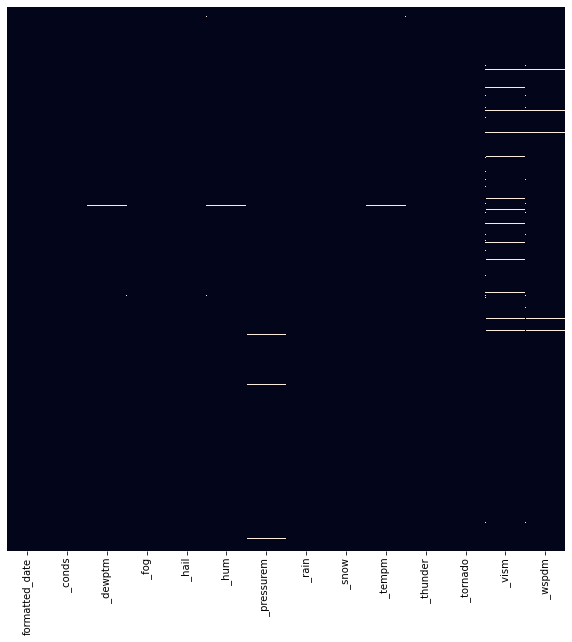

In [19]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df2.isnull(), yticklabels=False, cbar=False, ax=ax)

In [20]:
df3= df2.dropna()
df3.isnull().sum()

formatted_date    0
 _conds           0
 _dewptm          0
 _fog             0
 _hail            0
 _hum             0
 _pressurem       0
 _rain            0
 _snow            0
 _tempm           0
 _thunder         0
 _tornado         0
 _vism            0
 _wspdm           0
dtype: int64

In [21]:
#Extracting datetime and temperature from data
data=df3[['formatted_date', ' _tempm']]
data.columns=['date', 'temp']
data.head()

,date,temp
0,1996-11-01 11:00:00,30.0
4,1996-11-01 16:00:00,23.0
6,1996-11-01 18:00:00,21.0
14,1996-11-02 02:00:00,20.0
15,1996-11-02 03:00:00,22.0


In [22]:
#Making date column the index
data=data.set_index('date')
data.head()

,temp
date,
1996-11-01 11:00:00,30.0
1996-11-01 16:00:00,23.0
1996-11-01 18:00:00,21.0
1996-11-02 02:00:00,20.0
1996-11-02 03:00:00,22.0


In [23]:
data.index.month

Int64Index([11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
            ...
             4,  4,  4,  4,  4,  4,  4,  4,  4,  4],
           dtype='int64', name='date', length=95529)

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


[]

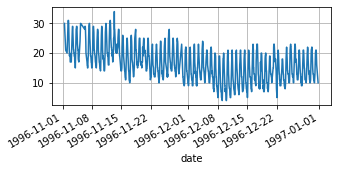

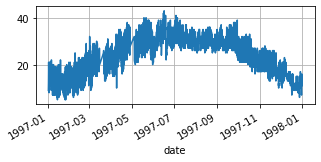

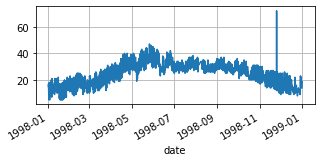

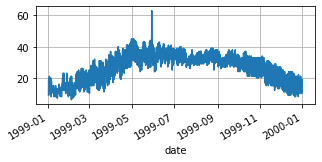

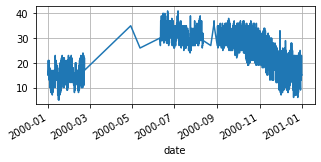

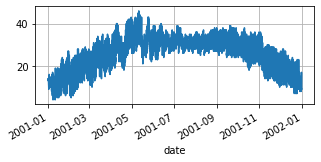

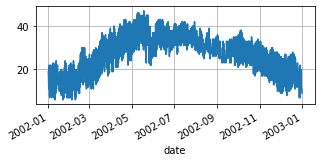

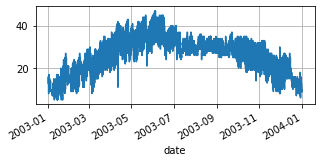

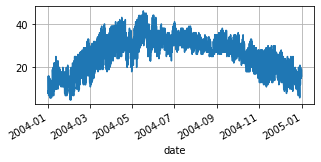

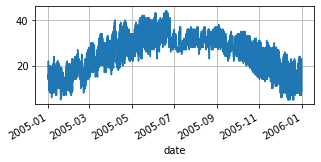

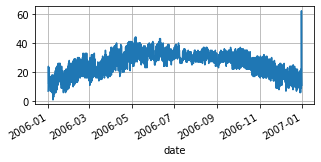

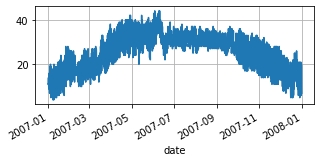

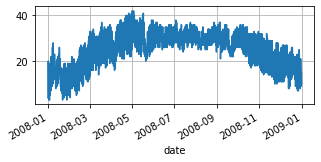

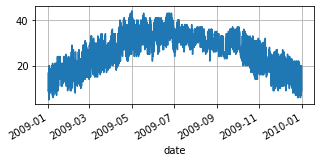

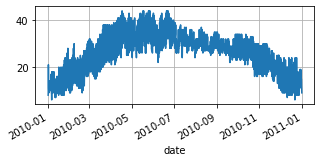

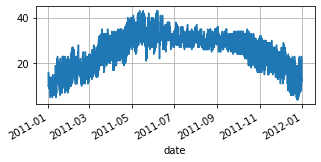

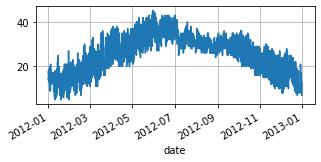

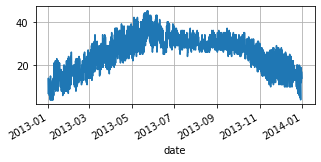

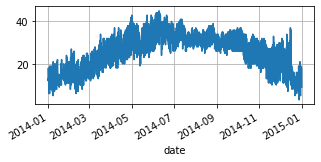

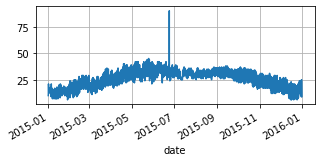

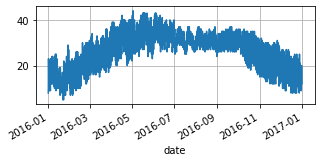

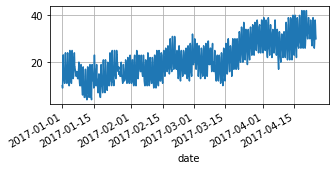

In [24]:
#It can be helpful to compare line plots for the same interval, such as from day-to-day, month-to-month, and year-to-year.
#We can group data by year and create a line plot for each year for direct comparison.

data.groupby(data.index.year).plot(subplots=True, legend=False, figsize=(5, 2), grid=True)
plt.plot()


[]

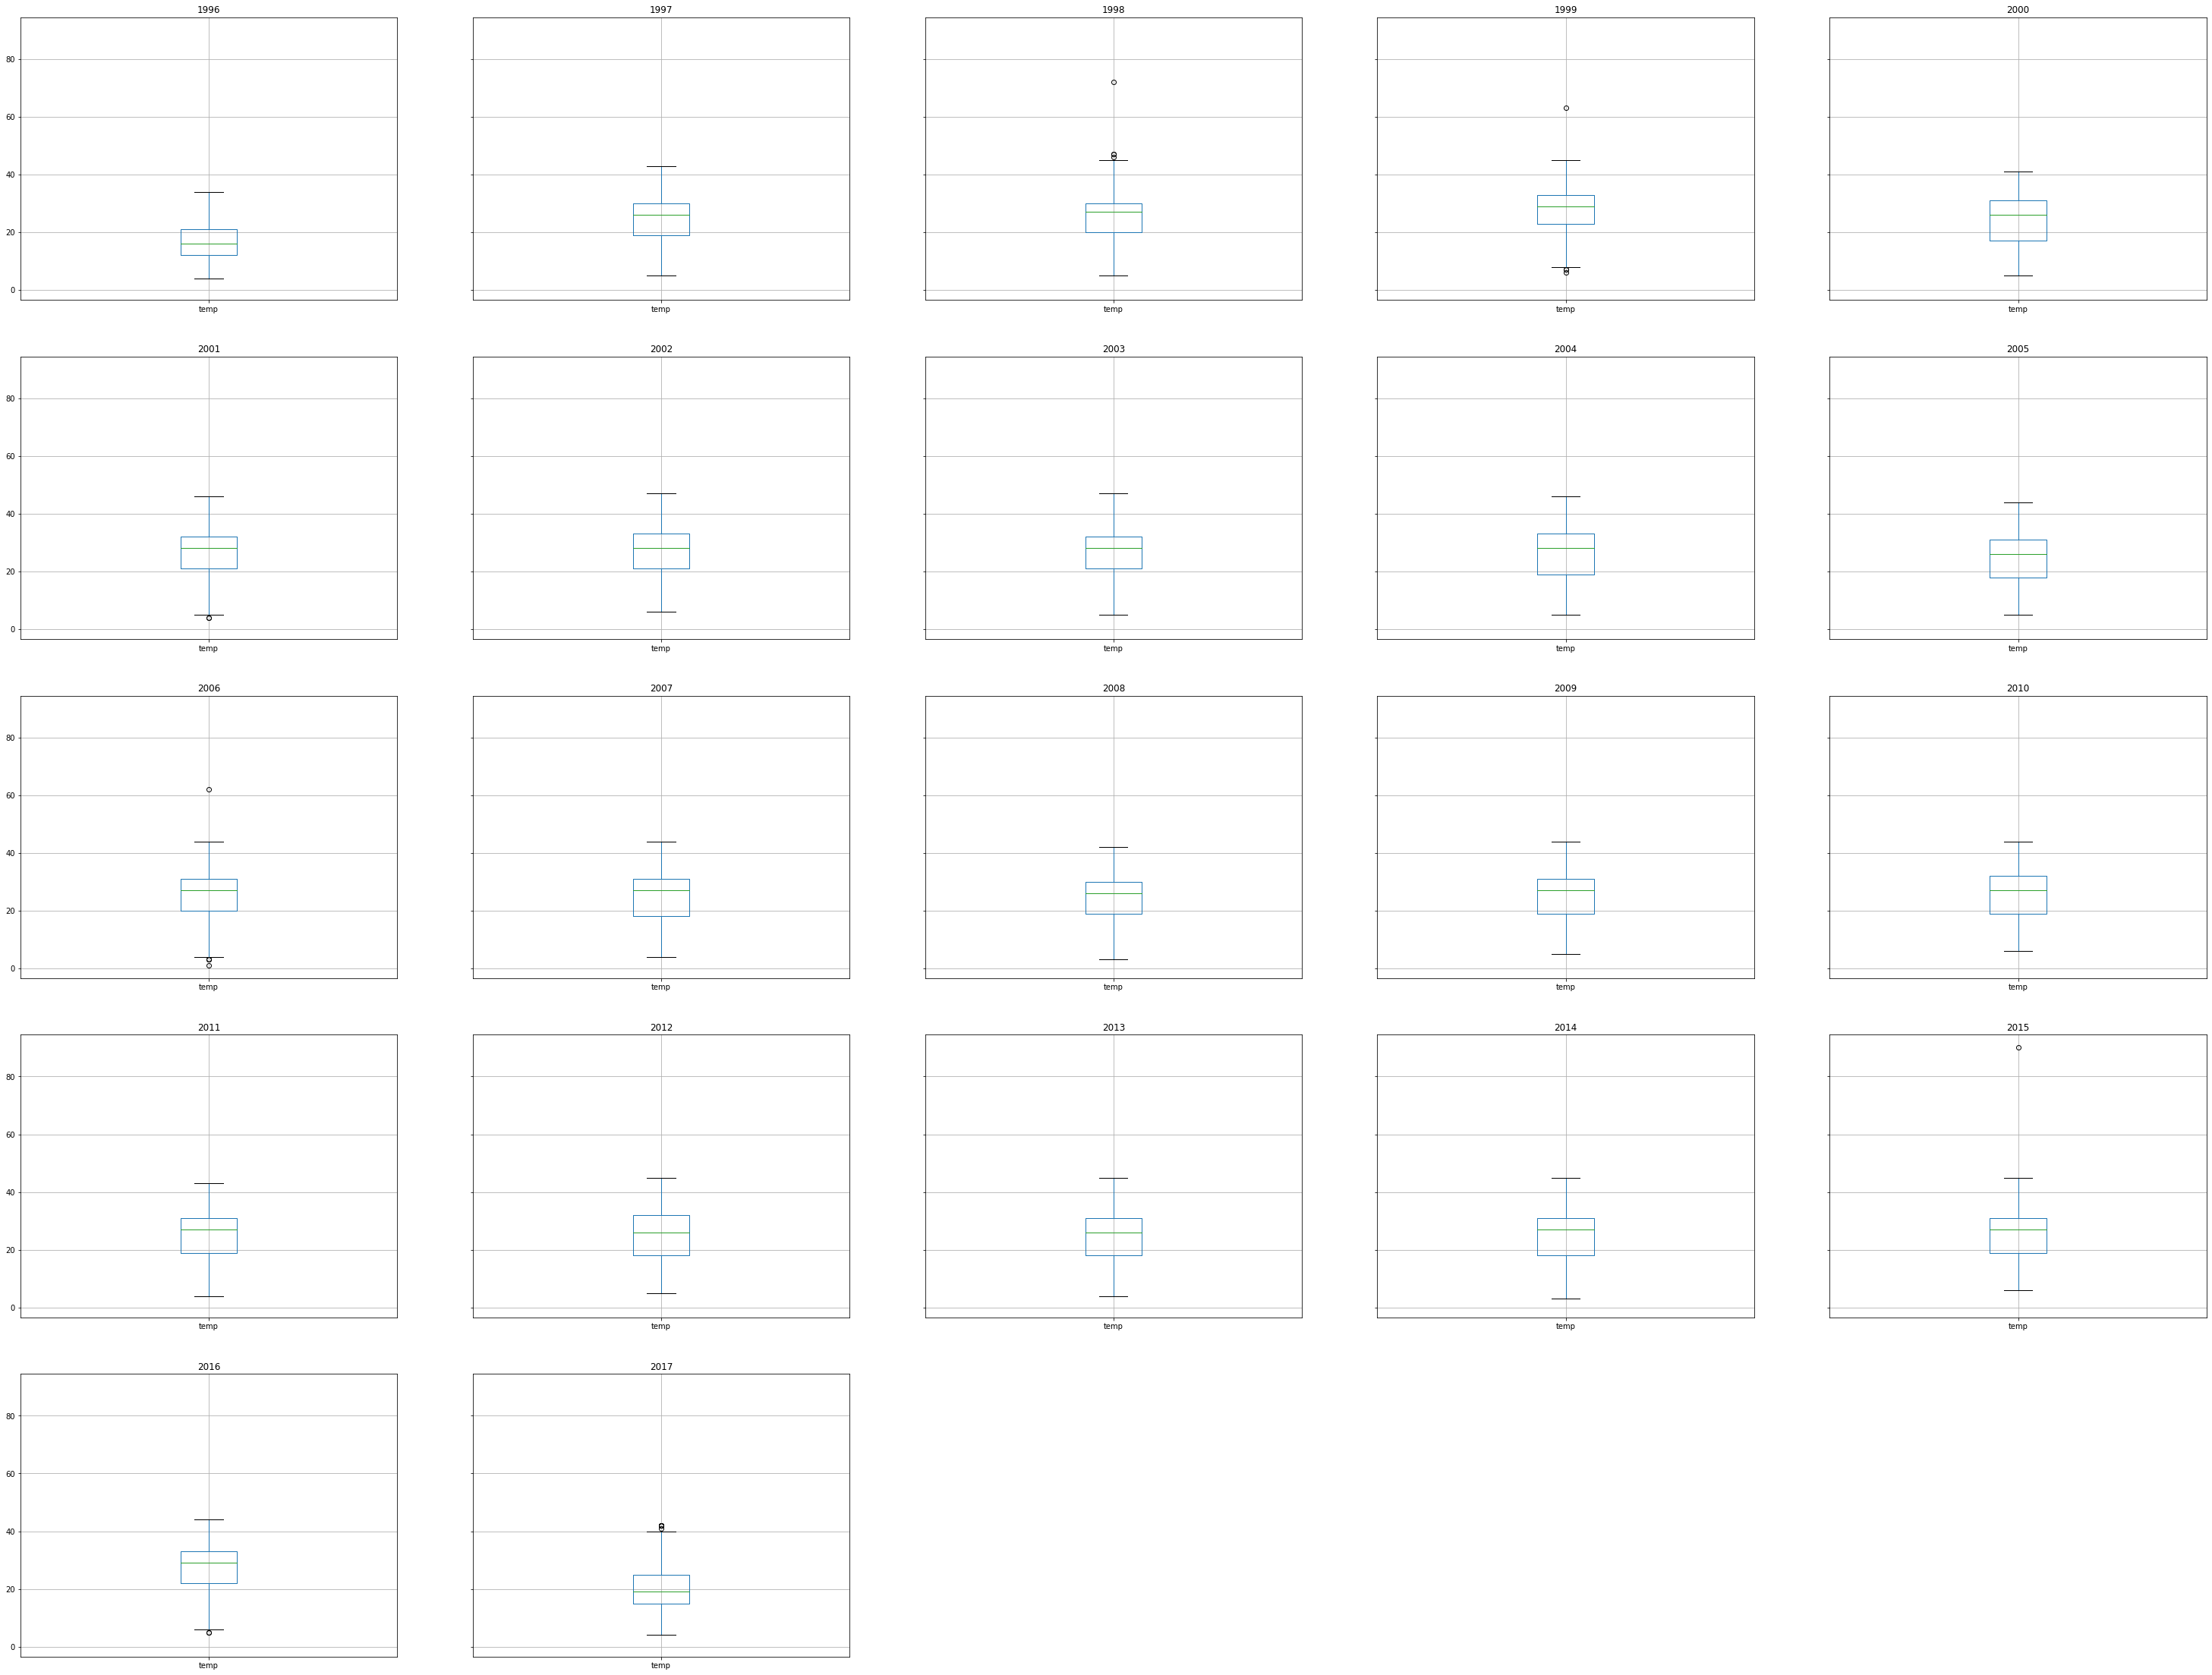

In [25]:
data.groupby(data.index.year).boxplot(figsize=(50,40), grid=True)
plt.plot()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


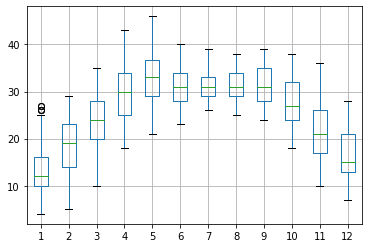

In [26]:
one_year = data[data.index.year==2001]
groups = one_year.groupby(pd.Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)
months.columns = range(1,13)
months.boxplot()
plt.show()


In [27]:
# one_year = data[data.index.year==2001]
# groups = one_year.groupby(pd.Grouper(freq='A'))
# years = pd.DataFrame()
# for name, group in groups:
# 	years[name.year] = group.values
# years = years.T
# pyplot.matshow(years, interpolation=None, aspect='auto')
# plt.show()

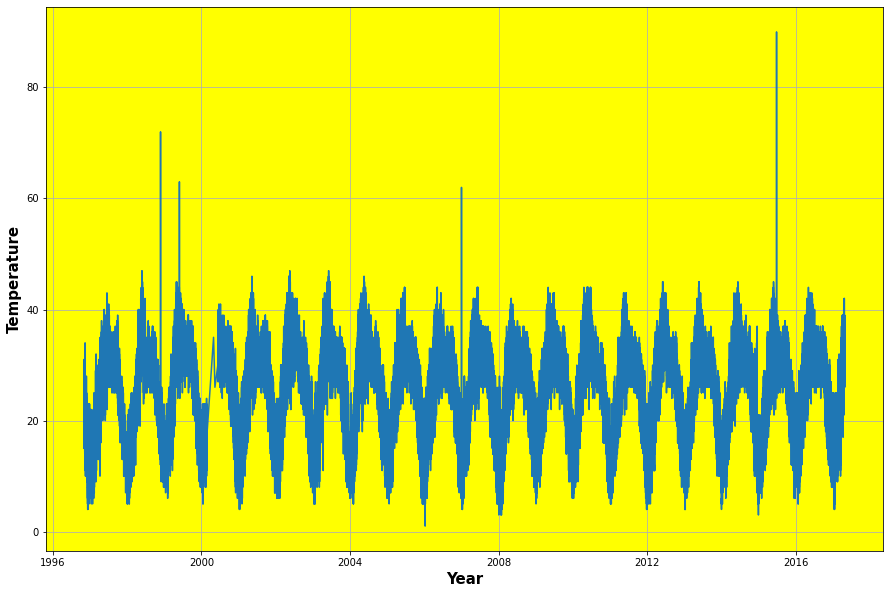

In [28]:
#Plotting Temp vs Year plot

fig=plt.figure(figsize=(15,10))
ax = plt.axes()
ax.set_facecolor("yellow")
plt.xlabel("Year",fontsize="15",fontweight="bold")
plt.ylabel("Temperature",fontsize="15",fontweight="bold")
plt.grid(True)
plt.plot(data)
plt.show()

In [29]:
#Obtaining average temperatures for each year, month, day and hour

daily_mean=data.groupby(data.index.day).mean()
monthly_mean=data.groupby(data.index.month).mean()
yearly_mean=data.groupby(data.index.year).mean()
hourly_mean=data.groupby(data.index.hour).mean()

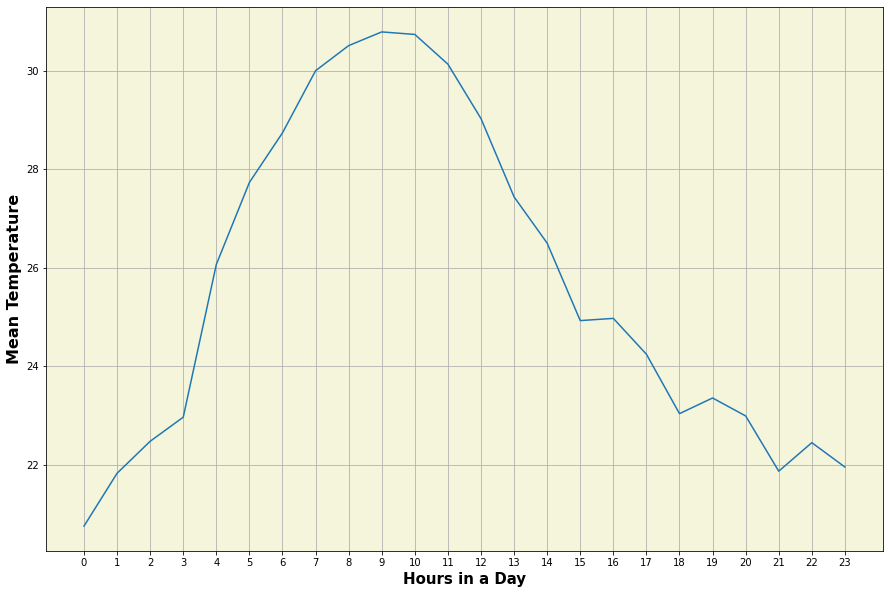

In [30]:
#Plotting Mean Temperature vs Hours in a Day

fig=plt.figure(figsize=(15, 10))
ax=plt.axes()
ax.set_facecolor("#F5F5DC")
plt.plot(hourly_mean)
plt.grid(True)
plt.xticks(range(0,24))
plt.xlabel("Hours in a Day",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=16,fontweight="bold")
plt.show()

#We notice that in general, the mean temperature is the higest at around noon time (10 am - 12 noon)

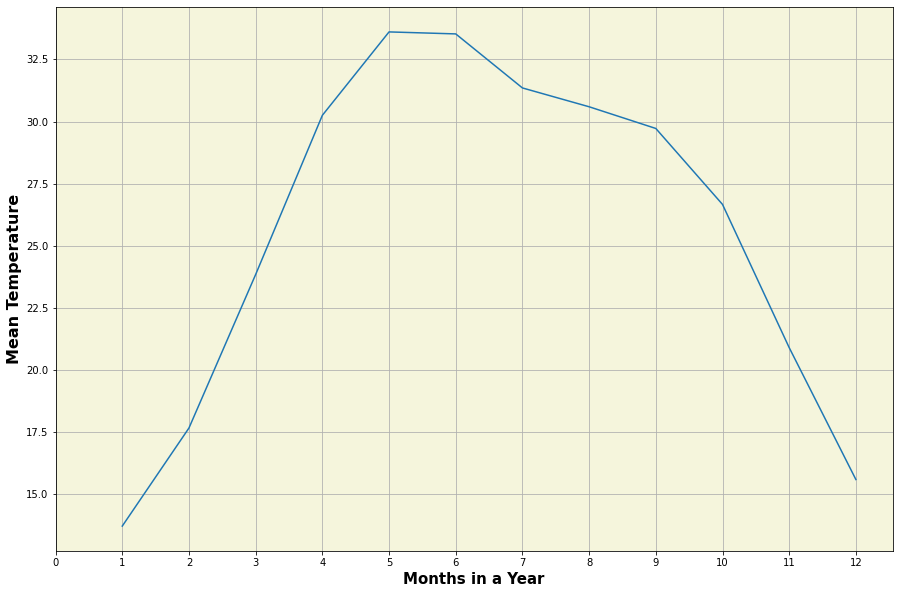

In [31]:
#Plotting Mean Temperature vs Months in a Year

fig=plt.figure(figsize=(15, 10))
ax=plt.axes()
ax.set_facecolor("#F5F5DC")
plt.plot(monthly_mean)
plt.grid(True)
plt.xticks(range(0,13))
plt.xlabel("Months in a Year",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=16,fontweight="bold")
plt.show()

#We notice that during Summer season (March-July), the mean temperature is the highest

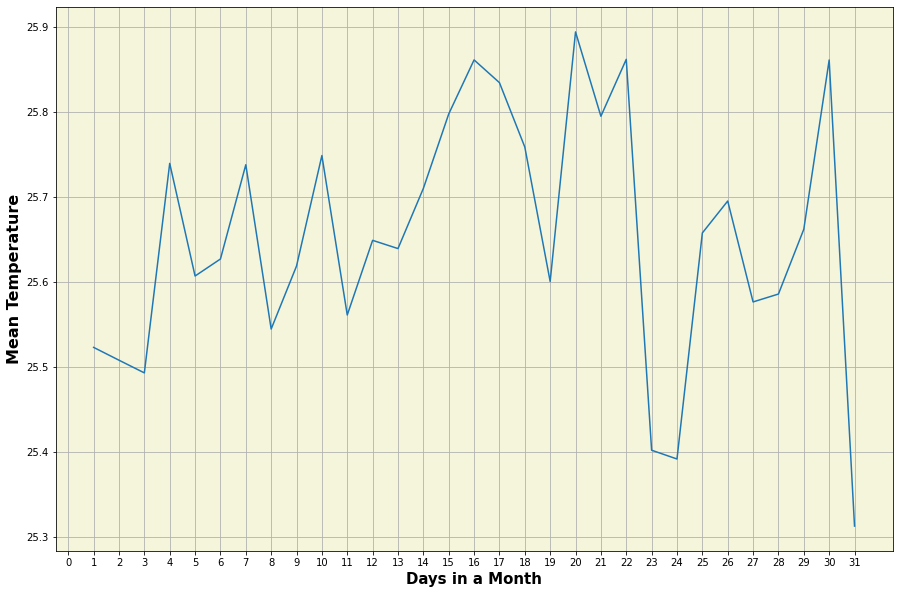

In [32]:
#Plotting Mean Temperature vs Days in a Month

fig=plt.figure(figsize=(15, 10))
ax=plt.axes()
ax.set_facecolor("#F5F5DC")
plt.plot(daily_mean)
plt.grid(True)
plt.xticks(range(0,32))
plt.xlabel("Days in a Month",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=16,fontweight="bold")
plt.show()

#We don't notice a recognizable pattern of the mean temperature for the days of a month. This can be because during different months, temperatures vary for different days in different months

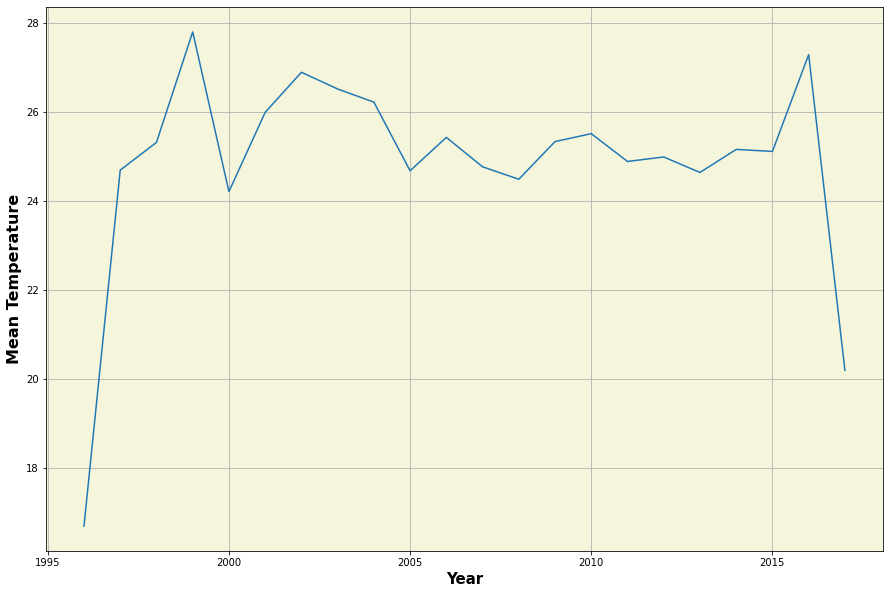

In [33]:
#Plotting Mean Temperature vs Year

fig=plt.figure(figsize=(15, 10))
ax=plt.axes()
ax.set_facecolor("#F5F5DC")
plt.plot(yearly_mean)
plt.grid(True)
plt.xlabel("Year",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=16,fontweight="bold")
plt.show()

#We notice that there's been a sharp increase in Delhi's average temperature from 1996, and has stabilized from around 2005

In [34]:
data

,temp
date,
1996-11-01 11:00:00,30.0
1996-11-01 16:00:00,23.0
1996-11-01 18:00:00,21.0
1996-11-02 02:00:00,20.0
1996-11-02 03:00:00,22.0
...,...
2017-04-24 06:00:00,34.0
2017-04-24 09:00:00,38.0
2017-04-24 12:00:00,36.0


In [35]:
#Extracting datetime, temprature and humidity

df4=df3[['formatted_date',  ' _hum',' _tempm']]
df4.columns=['date', 'humidity', 'temp']
df4.head()

,date,humidity,temp
0,1996-11-01 11:00:00,27.0,30.0
4,1996-11-01 16:00:00,47.0,23.0
6,1996-11-01 18:00:00,60.0,21.0
14,1996-11-02 02:00:00,52.0,20.0
15,1996-11-02 03:00:00,46.0,22.0


In [36]:
#Making date column the index
df4=df4.set_index('date')
df4.head()

,humidity,temp
date,,
1996-11-01 11:00:00,27.0,30.0
1996-11-01 16:00:00,47.0,23.0
1996-11-01 18:00:00,60.0,21.0
1996-11-02 02:00:00,52.0,20.0
1996-11-02 03:00:00,46.0,22.0


[]

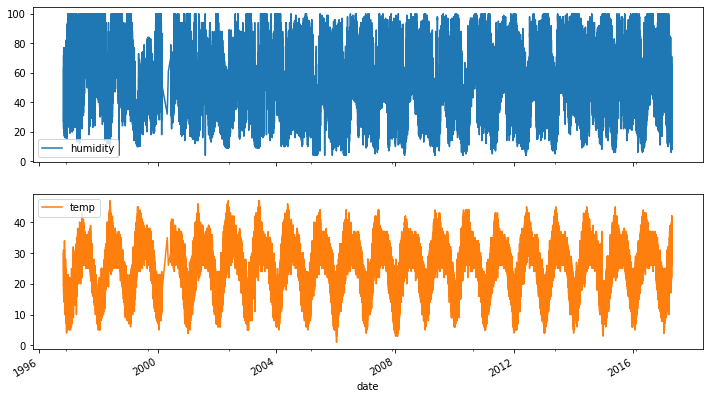

In [37]:
df4 = df4[df4['temp'] < 50]
df4 = df4[df4['humidity'] <= 100]
df4.plot(subplots=True, figsize=(12,7))
plt.legend()
plt.plot()
#It seems overplotted, let's plot for only two years 2015 and 2016, it will give us the clear picture of seasonality and tread.

[]

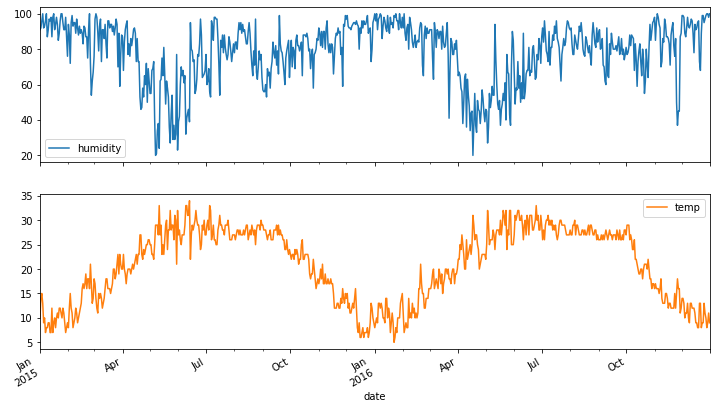

In [38]:
df4['2015':'2016'].resample('D').fillna(method='pad').plot(subplots=True, figsize=(12,7))
plt.plot()
#So it shows that mid two quarter are hotter than first and last, humidity varies accordingly.

In [39]:
df4.columns

Index(['humidity', 'temp'], dtype='object')

In [40]:
df4.drop(columns='humidity', axis=1, inplace=True)
df4 = df4['2000':'2017'].resample('M').mean().fillna(method='pad')

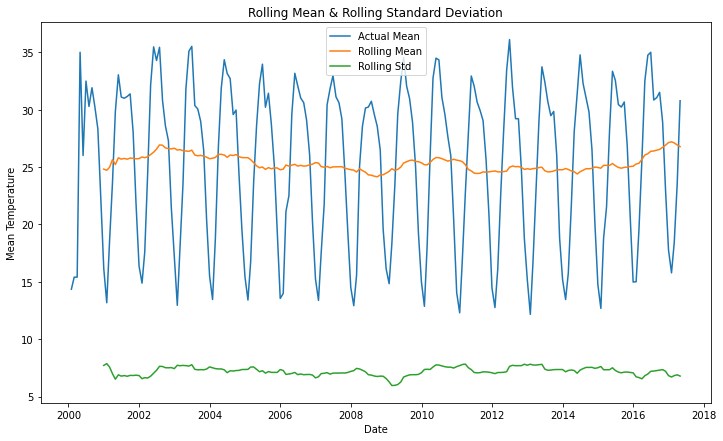

In [41]:
#Checking stationarity

#With the plot above, we understand that there exists 'seasonality' but no 'trend'.
#Let's check for below necessary conditions:

#Constant mean
#Constant variance
#An auto co-variance that does not depend on time

# check rolling mean and rolling standard deviation
def plot_rolling_mean_std(ts):
    rolling_mean = ts.rolling(12).mean()
    rolling_std = ts.rolling(12).std()
    plt.figure(figsize=(12, 7))

    plt.plot(ts, label='Actual Mean')
    plt.plot(rolling_mean, label='Rolling Mean')
    plt.plot(rolling_std, label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Rolling Standard Deviation')
    plt.legend()
    plt.show()

plot_rolling_mean_std(df4.temp)

Components of Time Series Data:

1. Trend: A gradual increase or decrease increase in the of observations(mean & variance) over a long period of time.

2. Seasonality: Repeating/predictable pattern over a certain time period.

3. Residual: It is also called as the white noise, which generally are the errors which does not account to trend and seasonality.

I have decomposed monthly data and it shows clear seasonality in every 12 months and from 2002-2008 the monthly temperature decreases, however increases later.

In [42]:
df4.head()

,temp
date,
2000-01-31,14.353242
2000-02-29,15.402778
2000-03-31,15.402778
2000-04-30,35.000000
2000-05-31,26.000000


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 1080x720 with 0 Axes>

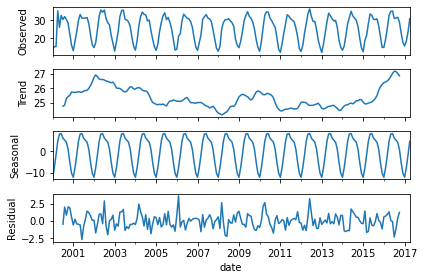

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(15, 10))
result=seasonal_decompose(df4)
result.plot()
plt.show()

Stationarity test:
Non-Stationarity data: Since we have observed that our data exhibits seasonality and trend & it will effect value of time series at different time. So to feed our time series data to Models we have to convert them into stationary data

Stationairty data: Data whose properties does not depend on time. The mean and variance remain constant with change in time, and hence the data dependence on time will be eliminated can perform statistical analysis on stationary data.

Ways to check stationarity:
1. Visualization: We have concluded form the above visualization plots that the data exhibits seasonality.

2. Adfuller test: We can confirm data stationarity using adfuller statistics which I have discussed below

In [44]:
# Augmented Dickey–Fuller test
from statsmodels.tsa.stattools import adfuller

def perform_dickey_fuller_test(ts):
    result = adfuller(ts, autolag='AIC')
    print('ADF statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('lags used: {}'.format(result[2]))
    print('Critical Values:' ,result[4])

perform_dickey_fuller_test(df4.temp)

ADF statistic: -1.7454757531056682
p-value: 0.40784729588640656
lags used: 13
Critical Values: {'1%': -3.4645146202692527, '5%': -2.8765564361715534, '10%': -2.5747745328940375}


Time series data is stationary if:
1. p-value<0.05
2. ADF statistic < Critical values

In our case, neither of the conditions is satisfied. Hence, we have non-stationary data

To convert non-stationary to stationary data, we will use the method of Differencing. 
  Differencing is a transformation method that is used to remove temporal dependence( time series' dependence on time). It does so by stabilizing the mean by removing changes in the level of a time series (and hence reducing trend/seasonality)

Here, we use Seasonal First Difference, where the shift is '12'

In [45]:
df4['seasonal_diff']=df4['temp']-df4['temp'].shift(12)
perform_dickey_fuller_test(df4['seasonal_diff'].dropna()) #dropna removes the first 12 rows

ADF statistic: -3.5083847926554275
p-value: 0.007774347981115162
lags used: 13
Critical Values: {'1%': -3.4668001583460613, '5%': -2.8775552336674317, '10%': -2.5753075498128246}


After performing Differencing,:
1. p-value<0.05
2.ADF-statistic < Critical values

Hence, now the tiems series data is stationary

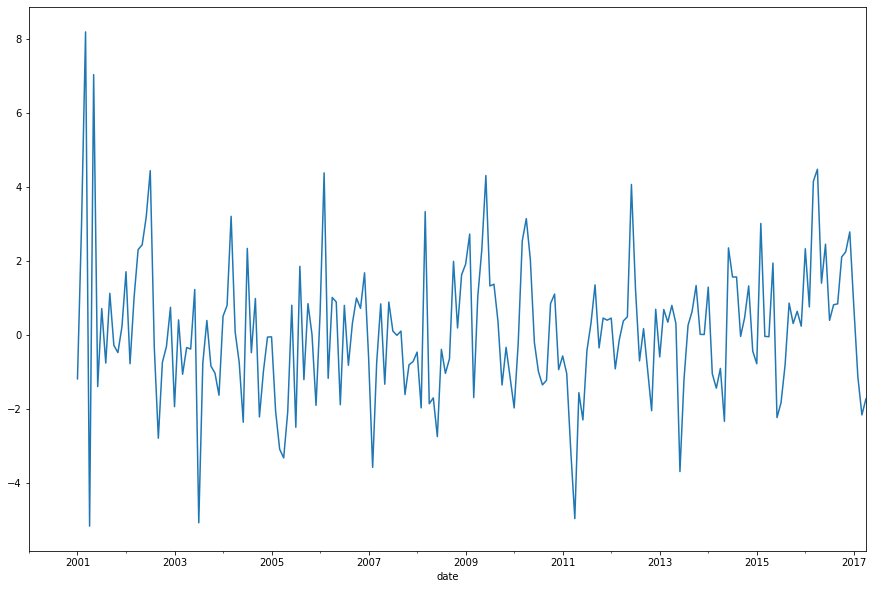

In [46]:
df4['seasonal_diff'].plot(figsize=(15, 10))
plt.show()

Lets plot auto-correlation and partial auto-correlation for the differenced series

Auto-Correlation plot will help find MA order and partial-autocorrelation for AR order i.e the order of p,q for time series model

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

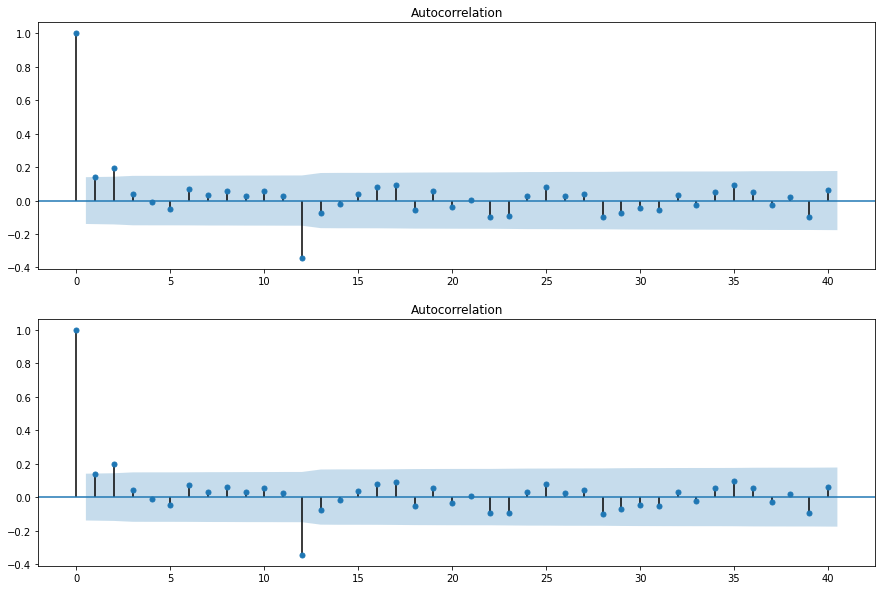

In [78]:
fig=plt.figure(figsize=(15, 10))
ax1=fig.add_subplot(211)
fig=plot_acf(df4['seasonal_diff'].dropna(), lags=40, ax=ax1)
ax2=fig.add_subplot(212)
fig=plot_acf(df4['seasonal_diff'].dropna(), lags=40, ax=ax2)


We observe that the plots have considered lag=0 as well, which we need to ignore.

**Data Splitting**

I used temperature data from 2002-2015 to train the model and 2015-2017 for testing purpose


In [49]:
train=df4["temp"][:"2015-01-01"].to_frame()
test=df4["temp"]["2015-01-01":].to_frame()

train.shape,test.shape

((180, 1), (28, 1))

**SARIMAX**

SARIMAX takes arguments order=(p,d,q) & seasonal_order=(P,D,Q,s), so for this reason I have initialized parameters to grid search over the best parameters for SARIMAX.

p -> AR model lags

d -> differencing

q -> MA model lags

In [50]:
import itertools

p=d=q=range(0,2)

pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in pdq]

This for loop will iterate over all combinations of initialized parameters, fit SARIMAX model with all combinations and parameters yeilding lowest AIC will be selected

In [57]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
l_aic=10000
for pdq_params in pdq:
  for seasonal_pdq_params in seasonal_pdq:
    try:
      model= SARIMAX(train,
                    order=pdq_params,
                    seasonal_order=seasonal_pdq_params
                    )
      result_aic= model.fit().aic

      if result_aic<l_aic: #To help find least AIC and its parameters
        l_aic=result_aic
        order_opt=pdq_params
        seasonal_order_opt=seasonal_pdq_params

      print("SARIMAX({}x{}12)-AIC:{}".format(pdq_params, seasonal_pdq_params, result_aic))
    except:
      continue

SARIMAX((0, 0, 0)x(0, 0, 0, 12)12)-AIC:1688.050040915818
SARIMAX((0, 0, 0)x(0, 0, 1, 12)12)-AIC:1490.103168838693
SARIMAX((0, 0, 0)x(0, 1, 0, 12)12)-AIC:694.6921087975427
SARIMAX((0, 0, 0)x(0, 1, 1, 12)12)-AIC:654.6397017845089
SARIMAX((0, 0, 0)x(1, 0, 0, 12)12)-AIC:808.6581346808587
SARIMAX((0, 0, 0)x(1, 0, 1, 12)12)-AIC:769.2264773477405
SARIMAX((0, 0, 0)x(1, 1, 0, 12)12)-AIC:668.4301346291006
SARIMAX((0, 0, 0)x(1, 1, 1, 12)12)-AIC:656.2344418031385
SARIMAX((0, 0, 1)x(0, 0, 0, 12)12)-AIC:1467.682554605277


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX((0, 0, 1)x(0, 0, 1, 12)12)-AIC:1301.5450422373856
SARIMAX((0, 0, 1)x(0, 1, 0, 12)12)-AIC:695.9311262476135
SARIMAX((0, 0, 1)x(0, 1, 1, 12)12)-AIC:654.6792623523983
SARIMAX((0, 0, 1)x(1, 0, 0, 12)12)-AIC:808.0216371091665
SARIMAX((0, 0, 1)x(1, 0, 1, 12)12)-AIC:766.6353480057439
SARIMAX((0, 0, 1)x(1, 1, 0, 12)12)-AIC:669.2023066715067
SARIMAX((0, 0, 1)x(1, 1, 1, 12)12)-AIC:656.5466921657653
SARIMAX((0, 1, 0)x(0, 0, 0, 12)12)-AIC:1039.6809051701075
SARIMAX((0, 1, 0)x(0, 0, 1, 12)12)-AIC:953.4686953040149
SARIMAX((0, 1, 0)x(0, 1, 0, 12)12)-AIC:793.5507738388912
SARIMAX((0, 1, 0)x(0, 1, 1, 12)12)-AIC:743.5809456093634
SARIMAX((0, 1, 0)x(1, 0, 0, 12)12)-AIC:857.3119526233784
SARIMAX((0, 1, 0)x(1, 0, 1, 12)12)-AIC:812.738424173024
SARIMAX((0, 1, 0)x(1, 1, 0, 12)12)-AIC:761.8899065912256
SARIMAX((0, 1, 0)x(1, 1, 1, 12)12)-AIC:743.5695442914641
SARIMAX((0, 1, 1)x(0, 0, 0, 12)12)-AIC:1009.2757449135073
SARIMAX((0, 1, 1)x(0, 0, 1, 12)12)-AIC:952.5050511679194
SARIMAX((0, 1, 1)x(0, 1, 0, 1

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMAX((1, 1, 1)x(1, 0, 1, 12)12)-AIC:736.2540746189595
SARIMAX((1, 1, 1)x(1, 1, 0, 12)12)-AIC:670.0160528407239
SARIMAX((1, 1, 1)x(1, 1, 1, 12)12)-AIC:656.8917377990656


The following combinations will be used as our parameters for the SARIMAX model

In [59]:
print("Least AIC: {}\nSARIMAX Order: {}\nSARIMAX Seasonal Order: {}".format(l_aic, order_opt, seasonal_order_opt))

Least AIC: 650.2622293421638
SARIMAX Order: (1, 0, 1)
SARIMAX Seasonal Order: (0, 1, 1, 12)


In [65]:
model=SARIMAX(train,
             order=(1, 0, 1),
             seasonal_order=(0, 1, 1, 12)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                               temp   No. Observations:                  180
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -321.131
Date:                            Wed, 20 Oct 2021   AIC                            650.262
Time:                                    10:21:13   BIC                            662.758
Sample:                                01-31-2000   HQIC                           655.334
                                     - 12-31-2014                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7895      0.169      4.674      0.000       0.458       1.121
ma.L1         -0.6448      0.192     -3.361      0.001      -1.021      -0.269
ma.S.L12      -0.7974      0.084     -9.539      0.000      -0.961      -0.634
sigma2         2.4919      0.216     11.549      0.000       2.069       2.915
===================================================================================
Ljung-Box (Q):                       50.71   Jarque-Bera (JB):                72.30
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               0.25   Skew:                             0.96
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Residual plot: There is no obvious patterns observed.

Histogram + KDE plot: KDE curve is similar to the normal distribution

Normal Q-Q: Most of the data points lies around and on the red line

Correlogram :correlations for lag greater than one is not significant

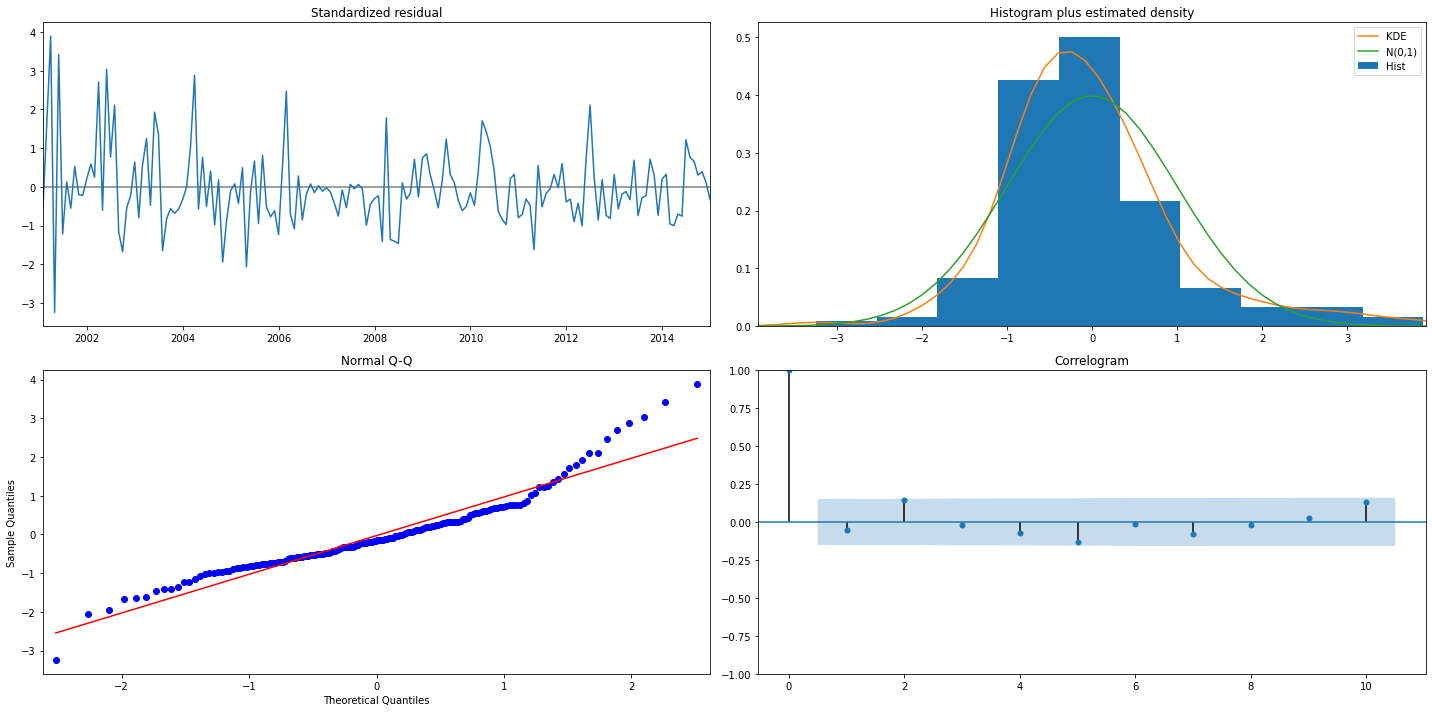

In [70]:
model.plot_diagnostics(figsize=(20,10))
plt.tight_layout()
plt.show()

**Predict the test data**

In [79]:
predict=model.get_prediction(start=len(train),
                             end=len(train)+len(test)-1)

Getting the upper and lower bounds of predicted values

In [80]:
bounds=predict.conf_int()
bounds.head()

,lower temp,upper temp
2015-01-31,10.103857,16.293015
2015-02-28,13.890426,20.143996
2015-03-31,19.932816,26.226198
2015-04-30,26.152671,32.470740
2015-05-31,29.598484,35.931891


In [81]:
lower_lim=bounds["lower temp"]
upper_lim=bounds["upper temp"]

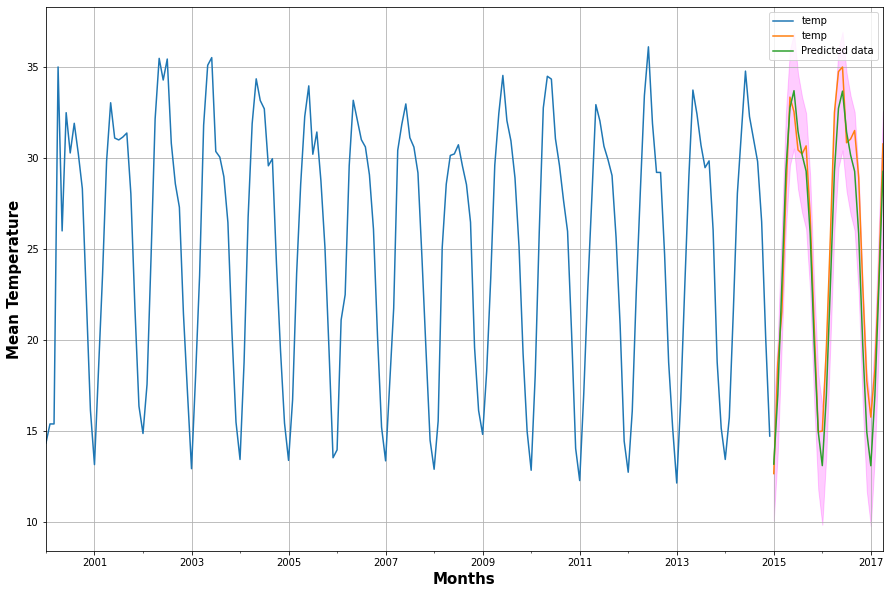

In [86]:
predict_values=predict.predicted_mean
ax=train.plot(label="Training Data",figsize=(15, 10))
test.plot(label="Testing Data",ax=ax)
predict_values.plot(label="Predicted data",ax=ax)

ax.fill_between(bounds.index,lower_lim,upper_lim,color="magenta",alpha=0.2)
plt.xlabel("Months",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=15,fontweight="bold")
plt.grid(True)
plt.legend(loc="best")
plt.show()

Our Prediction is working well as of now and giving us good results on Test data

In [88]:
from sklearn.metrics import mean_squared_error

rmse=mean_squared_error(test["temp"].values,predict_values,squared=False)
rmse

1.8260951232167908

RMSE is 1.8 which is pretty good

In [90]:
test.tail()

,temp
date,
2016-12-31,17.760938
2017-01-31,15.776730
2017-02-28,18.393701
2017-03-31,23.553459
2017-04-30,30.775120


Now lets try to predict new data from March 2017 to December 2021

In [91]:
dates_to_predict=pd.date_range(start="2017-04-30", end="2021-12-31", freq="M")
len(dates_to_predict)

57

In [94]:
new_predict=model.get_prediction(start=len(df4),
                                 end=(len(df4)+len(dates_to_predict)))

In [95]:
new_predict_values=new_predict.predicted_mean

In [104]:
new_bounds=new_predict.conf_int()
new_lower_lim=new_bounds["lower temp"]
new_upper_lim=new_bounds["upper temp"]

The new predicted Monthly average Temperature

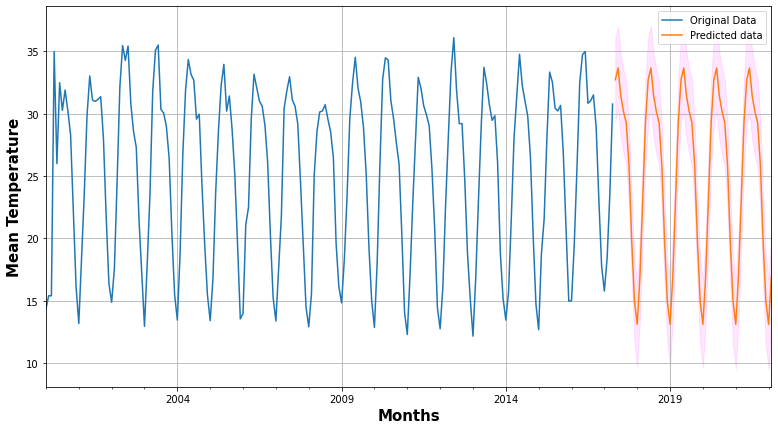

In [107]:
ax=df4["temp"].plot(label="Original Data",figsize=(13,7))
new_predict_values.plot(label="Predicted data",ax=ax)
ax.fill_between(new_bounds.index,new_lower_lim,new_upper_lim,color="magenta",alpha=0.1)

plt.xlabel("Months",fontsize=15,fontweight="bold")
plt.ylabel("Mean Temperature",fontsize=15,fontweight="bold")
plt.grid(True)
plt.legend(loc="best")
plt.show()